<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
print("done")

done


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [19]:
df = pd.read_csv(file_name)

0     61000.0
1     95179.0
2     90000.0
3    455352.0
4     65277.0
Name: ConvertedComp, dtype: float64

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


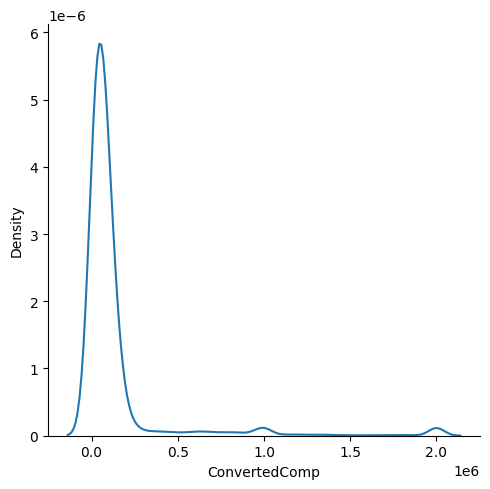

In [44]:
sns.displot(data=df, x='ConvertedComp', kind='kde')

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp', ylabel='Count'>

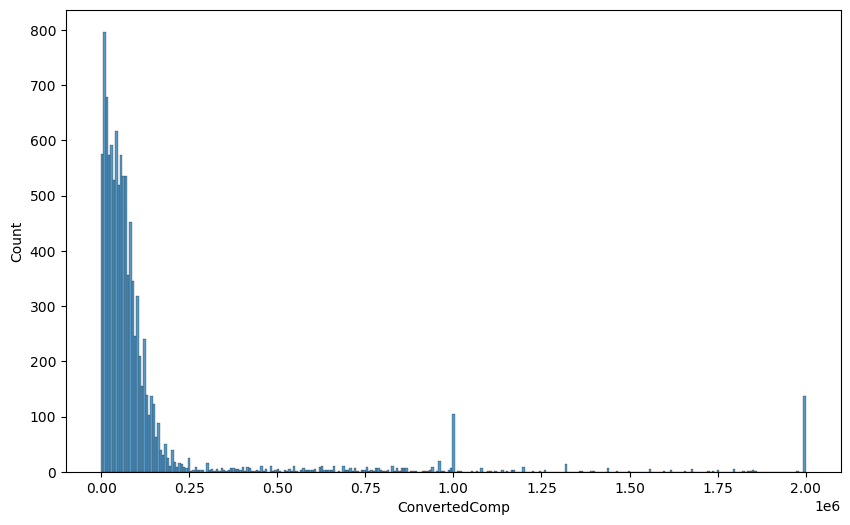

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ConvertedComp', stat='count')

What is the median of the column `ConvertedComp`?


In [46]:
df['ConvertedComp'].median()  # 57745.0 median 

57745.0

How many responders identified themselves only as a **Man**?


In [61]:
df[['Gender']].value_counts()  # 10480 identified as male - very male dominated as expected

Gender                                                     
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [69]:
df['ConvertedComp'].groupby(df['Gender']).median()  # median comp for Women == $57708.0 (again lower than men, but only marginally)

Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [70]:
df['Age'].describe().loc[['min', '25%', '50%', '75%', 'max']]

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:xlabel='Age', ylabel='Count'>

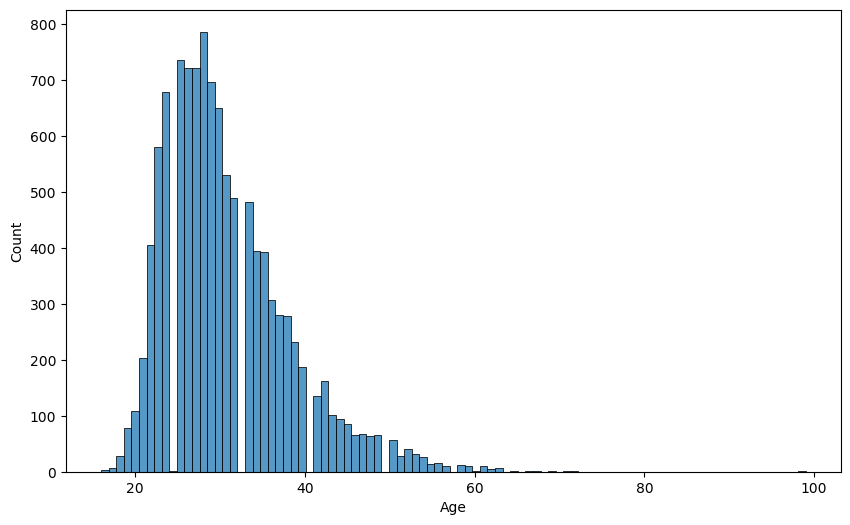

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:ylabel='ConvertedComp'>

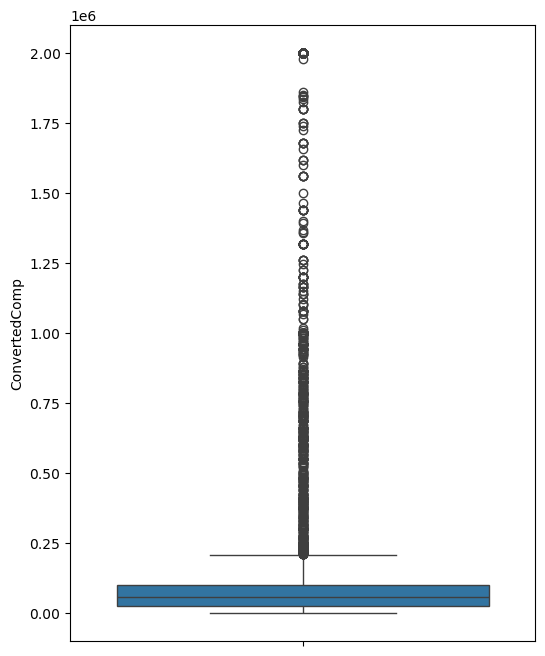

In [96]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df['ConvertedComp'])  # many ouytliers exist for Age ConvertedComp


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [92]:
Q1 = df['ConvertedComp'].describe().loc[['25%']]
Q3 = df['ConvertedComp'].describe().loc[['75%']]
IQR = float(Q3) - float(Q1)
IQR  # 73132.0

73132.0

Find out the upper and lower bounds.


In [97]:
# your code goes here
Q1, Q3  # $26868.0 to $100000.0 

(26868.0, 100000.0)

Identify how many outliers are there in the `ConvertedComp` column.


In [108]:
lower_fence = 26868 - (1.5 * IQR)
upper_fence = 100000 + (1.5 * IQR)

count = 0
for value in df['ConvertedComp']:
    if value < lower_fence or value > upper_fence:
        count += 1

print(count)  # 879 outliers 



0


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


<AxesSubplot:ylabel='ConvertedComp'>

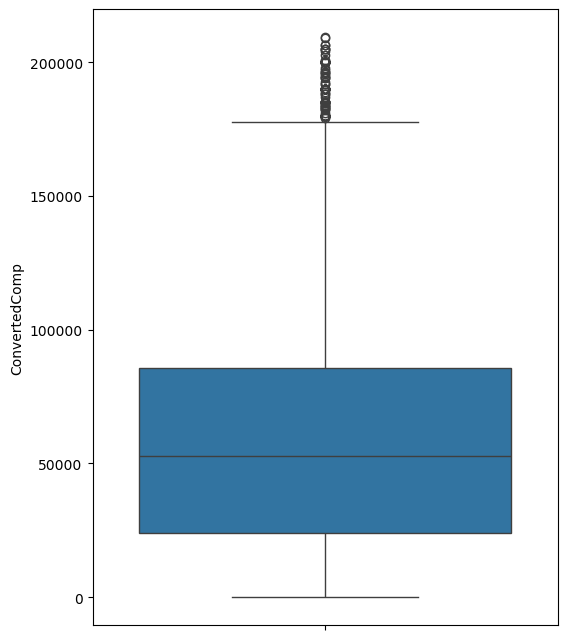

In [110]:
for index, row in df.iterrows():
    if row['ConvertedComp'] < lower_fence or row['ConvertedComp'] > upper_fence:
        df.drop(index, inplace = True)

count = 0
for value in df['ConvertedComp']:
    if value < lower_fence or value > upper_fence:
        count += 1  # no outliers now! (confirmed with boxplot visual inspection)

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [114]:
df.corr(numeric_only=True)['Age'] # m

Respondent       0.003950
CompTotal        0.006371
ConvertedComp    0.401821
WorkWeekHrs      0.037452
CodeRevHrs      -0.017961
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
